In [1]:
import sqlite3
import pandas as pd

def db_connect(dbname="/opt/ml/P-Stage/2-STAGE/database/nopain.db"):
    conn = sqlite3.connect(dbname)
    return conn

In [2]:
def recreate_database():
    pass

In [3]:
def insert_strategy(strategy):
    conn = db_connect()
    query = f"INSERT INTO STRATEGY('strategy') VALUES('{strategy}')"

    cur = conn.cursor()
    cur.execute(query)
    
    conn.commit()
    conn.close()

In [4]:
def delete_strategy(idx):
    conn = db_connect()
    query = f"DELETE FROM STRATEGY WHERE id={idx}"

    cur = conn.cursor()
    cur.execute(query)
    
    conn.commit()
    conn.close()

In [5]:
def show_all_rows(table_name):
    conn = db_connect()
    query = f"SELECT * FROM {table_name}"

    cur = conn.cursor()
    cur.execute(query)

    rows = cur.fetchall()  # fetchone, fetchmany
    conn.close()
    return rows

In [6]:
def change_status_of_strategy(strategy, status):
    conn = db_connect()
    
    query = f"UPDATE STRATEGY SET status='{status}' WHERE strategy='{strategy}'"
    cur = conn.cursor()
    cur.execute(query)
    
    conn.commit()
    conn.close()    

In [7]:
def execute_query(query):
    conn = db_connect()

    cur = conn.cursor()
    cur.execute(query)

    conn.commit()
    conn.close()

In [8]:
def insert_model_scores(args, s_cnt, acc):
    query = f"INSERT INTO MODEL(strategy, ms_name, s_cnt, v_score, dataset, dataset_idx) \
VALUES('{args.strategy}', '{args.ms_name}', {int(s_cnt)}, {acc}, '{args.data_kind}', '{args.dataset_idx}')"
    execute_query(query)

st13, st14, st15

strategy = "st15"
ms_name = "kobert"
v_score = 0.1604
dataset = 'dataset_v4'
dataset_idx = '4'
s_cnt = 0

query = f"UPDATE STRATEGY SET cnt=1, v_max_score={v_score}, v_avg_score={v_score} WHERE strategy='{strategy}'"
execute_query(query)

query = f"INSERT INTO MODEL(strategy, ms_name, s_cnt, v_score, dataset, dataset_idx) \
VALUES('{strategy}', '{ms_name}', {s_cnt}, {v_score}, '{dataset}', '{dataset_idx}')"
execute_query(query)

In [100]:
delete_strategy()

In [54]:
insert_strategy("st18")

In [88]:
change_status_of_strategy('st03', 'PENDING')

In [94]:
for st in range(1, 13):
    strategy = "st{:02}".format(st)
    change_status_of_strategy(strategy, "PENDING")

In [488]:
strategy = pd.DataFrame(show_all_rows('STRATEGY'), columns=['id', 'strategy', 'cnt', 
                                                 'status', 'v_max_score', 'v_avg_score',
                                                'lb_max_score', 'lb_avg_score'])

strategy = strategy.set_index('id')
strategy

,strategy,cnt,status,v_max_score,v_avg_score,lb_max_score,lb_avg_score
id,,,,,,,
1,st03,3,PENDING,0.620281,0.597335,0.0,0.0
2,st04,4,PENDING,0.674528,0.655955,0.0,0.0
3,st05,4,PENDING,0.657429,0.639446,0.0,0.0
4,st01,4,PENDING,0.640266,0.624352,0.0,0.0
5,st02,3,PENDING,0.643967,0.612386,0.0,0.0
6,st06,4,PENDING,0.655070,0.627128,0.0,0.0
7,st07,3,PENDING,0.300518,0.258574,0.0,0.0
8,st08,3,PENDING,0.065137,0.030101,0.0,0.0
9,st09,4,PENDING,0.654330,0.632865,0.0,0.0


In [494]:
model_df = pd.DataFrame(show_all_rows('MODEL'), columns = ['id', 'strategy', 'ms_name', 's_cnt', 
                                                'v_score', 'lb_score', 'dataset', 'dataset_idx'])
model_df = model_df.set_index('id')
model_df.tail(20)

,strategy,ms_name,s_cnt,v_score,lb_score,dataset,dataset_idx
id,,,,,,,
72,st14,xlmroberta,3,0.773585,0.0,dataset_v4,0
73,st14,xlmroberta,3,0.773585,0.0,dataset_v4,0
74,st13,xlmroberta,3,0.663915,0.0,dataset_v4,0
75,st13,xlmroberta,3,0.663915,0.0,dataset_v4,0
76,st16,kobert,4,0.668042,0.0,dataset_v4,0
77,st16,kobert,4,0.668042,0.0,dataset_v4,0
78,st18,distilkobert,3,0.569575,0.0,dataset_v4,0
79,st18,distilkobert,3,0.569575,0.0,dataset_v4,0
80,st15,kobert,3,0.601415,0.0,dataset_v4,2


In [490]:
trash_models = rows[17:]

In [59]:
model_dir = '/opt/ml/P-Stage/2-STAGE/weights/'

In [65]:
"{}_{}_{:03}".format(*trash_models[0][1:4])

'st03_koelecv3_000'

In [78]:
import os
import shutil

def remove_trashmodels(trash_models):
    for trash_model in trash_models:
        model_path = "{}_{}_{:03}.pth".format(*trash_model[1:4])
        os.remove(os.path.join(model_dir, model_path))

In [567]:
big_model_df = model_df[model_df['ms_name'] != "koelecv3"]

In [568]:
big_model_df = big_model_df[big_model_df['v_score'] > 0.65].sort_values(['v_score'], ascending=False)
big_model_df

,strategy,ms_name,s_cnt,v_score,lb_score,dataset,dataset_idx
id,,,,,,,
73,st14,xlmroberta,3,0.773585,0.0,dataset_v4,0
72,st14,xlmroberta,3,0.773585,0.0,dataset_v4,0
61,st14,xlmroberta,2,0.767689,0.0,dataset_v4,3
60,st14,xlmroberta,2,0.767689,0.0,dataset_v4,3
49,st14,xlmroberta,1,0.767099,0.0,dataset_v4,4
48,st14,xlmroberta,1,0.767099,0.0,dataset_v4,4
45,st14,xlmroberta,0,0.763600,0.0,dataset_v4,3
84,st14,xlmroberta,4,0.755307,0.0,dataset_v4,3
85,st14,xlmroberta,4,0.755307,0.0,dataset_v4,3


In [571]:
big_model_df = big_model_df[big_model_df.duplicated()]
big_model_df

,strategy,ms_name,s_cnt,v_score,lb_score,dataset,dataset_idx
id,,,,,,,
72,st14,xlmroberta,3,0.773585,0.0,dataset_v4,0
60,st14,xlmroberta,2,0.767689,0.0,dataset_v4,3
48,st14,xlmroberta,1,0.767099,0.0,dataset_v4,4
85,st14,xlmroberta,4,0.755307,0.0,dataset_v4,3
89,st16,kobert,5,0.682193,0.0,dataset_v4,0
63,st13,xlmroberta,2,0.673939,0.0,dataset_v4,0
77,st16,kobert,4,0.668042,0.0,dataset_v4,0
50,st13,xlmroberta,1,0.665684,0.0,dataset_v4,1
75,st13,xlmroberta,3,0.663915,0.0,dataset_v4,0


In [577]:
roberta_no_sampling_names = []

for i, rows in big_model_df.iloc[:3].iterrows():
    name = f"{rows[0]}_{rows[1]}_{rows[2]:03}"
    roberta_no_sampling_names.append(name)

In [578]:
roberta_use_sampling_names = []
# data 분포가 다른 것만을 사용.
for i, rows in big_model_df.loc[[89, 63, 50]].iterrows():
    name = f"{rows[0]}_{rows[1]}_{rows[2]:03}"
    roberta_use_sampling_names.append(name)

In [579]:
roberta_no_sampling_names

['st14_xlmroberta_003', 'st14_xlmroberta_002', 'st14_xlmroberta_001']

In [580]:
roberta_use_sampling_names

['st16_kobert_005', 'st13_xlmroberta_002', 'st13_xlmroberta_001']

In [79]:
remove_trashmodels(trash_models)

In [80]:
trash_models

[(1, 'st03', 'koelecv3', 0, 0.6202812731310141, 0.0, 'dataset_v3', '4'),
 (19, 'st01', 'koelecv3', 1, 0.613619541080681, 0.0, 'dataset_v1', '2'),
 (26, 'st09', 'koelecv3', 2, 0.613619541080681, 0.0, 'dataset_v1', '3'),
 (25, 'st04', 'koelecv3', 2, 0.6084905660377359, 0.0, 'dataset_v4', '2'),
 (4, 'st01', 'koelecv3', 0, 0.6062176165803109, 0.0, 'dataset_v1', '1'),
 (18, 'st03', 'koelecv3', 1, 0.5936343449296817, 0.0, 'dataset_v3', '1'),
 (28, 'st06', 'koelecv3', 2, 0.5906735751295337, 0.0, 'dataset_v1', '1'),
 (31, 'st03', 'koelecv3', 2, 0.5780903034789046, 0.0, 'dataset_v3', '4'),
 (27, 'st02', 'koelecv3', 2, 0.5573649148778682, 0.0, 'dataset_v2', '2'),
 (10, 'st10', 'koelecv3', 0, 0.3471502590673575, 0.0, 'dataset_v1', '3'),
 (23, 'st12', 'koelecv3', 1, 0.30717986676535897, 0.0, 'dataset_v1', '0'),
 (21, 'st07', 'koelecv3', 1, 0.3005181347150259, 0.0, 'dataset_v1', '2'),
 (33, 'st07', 'koelecv3', 2, 0.25758697261287933, 0.0, 'dataset_v1', '1'),
 (34, 'st12', 'koelecv3', 2, 0.256106587

In [98]:
good_ids = [row[0] for row in rows[:16]]
good_ids

[13, 37, 2, 29, 6, 16, 17, 5, 41, 40, 30, 9, 15, 38, 39, 3]

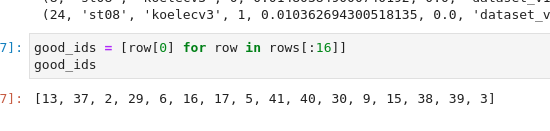

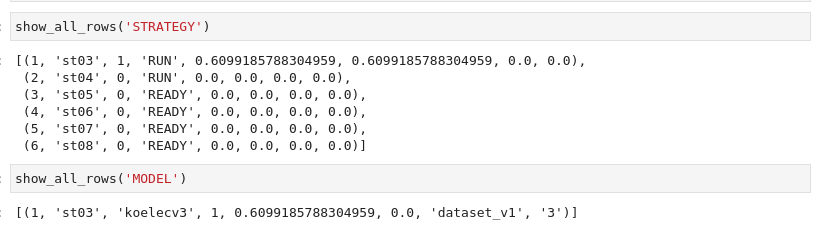

## Ensemble Test

In [14]:
good_ids = [13, 37, 2, 29, 6, 16, 17, 5, 41, 40, 30, 9, 15, 38, 39, 3]

In [15]:
model_df = model_df.loc[good_ids]
model_df

,strategy,ms_name,s_cnt,v_score,lb_score,dataset,dataset_idx
id,,,,,,,
13,st04,koelecv3,1,0.674528,0.0,dataset_v4,2
37,st04,koelecv3,3,0.674528,0.0,dataset_v4,2
2,st04,koelecv3,0,0.666274,0.0,dataset_v4,1
29,st05,koelecv3,2,0.657429,0.0,dataset_v5,2
6,st06,koelecv3,0,0.655070,0.0,dataset_v1,1
16,st09,koelecv3,1,0.654330,0.0,dataset_v1,3
17,st05,koelecv3,1,0.646226,0.0,dataset_v5,0
5,st02,koelecv3,0,0.643967,0.0,dataset_v2,4
41,st01,koelecv3,3,0.640266,0.0,dataset_v1,1


In [16]:
import sys
sys.path.append("..")

In [20]:
import os
import torch
import numpy as np
from config import get_args
from utils import update_args
from networks import load_model_and_tokenizer
import hp_space
from argparse import Namespace
from prepare import load_test_dataloader

In [389]:
test_dataloader = load_test_dataloader(args, tokenizer)

In [390]:
preds = model.evaluate(test_dataloader, return_keys=['acc', 'logits'])

In [394]:
preds['logits'].shape

(1000, 42)

In [405]:
nvnv = scipy.special.softmax(preds['logits'], axis=-1)

In [407]:
nvnv.shape

(1000, 42)

In [408]:
nvnv[0].sum()

1.0

In [409]:
model_dir = '/opt/ml/P-Stage/2-STAGE/weights/'

def get_categorical_distribution(strategy, ms_name, s_cnt):
    model_name = f"{strategy}_{ms_name}_{s_cnt:03}"
    model_path = os.path.join(model_dir, model_name + ".pth")
    
    if not os.path.exists(model_path):
        raise
    
    args = get_args()
    args = update_args(args, strategy, hp_space.strat)
    args = Namespace(**args)
    
    model, tokenizer = load_model_and_tokenizer(args)
    test_dataloader = load_test_dataloader(args, tokenizer)
    
    model.load_state_dict(torch.load(model_path))
    model.to(args.device)
    
    results = model.evaluate(test_dataloader, return_keys=["logits"])
    results['logits'] = scipy.special.softmax(results['logits'], axis=-1)
    
    # 각 샘플에 대해서 Category 분포로 만든 후에,
    # 1000개 샘플에 대해서 평균, 분산
    
    vector_mean = results['logits'].mean(axis=0)
    vector_std = results['logits'].std(axis=0)
    
    model_vector = np.concatenate((vector_mean, vector_std))
    
    return model_name, model_vector

In [410]:
model_names = []
model_vectors = []

for i, rows in model_df.iterrows():
    model_name, model_vector = get_categorical_distribution(*rows[:3])
    model_names.append(model_name)
    model_vectors.append(model_vector)

Some weights of the model checkpoint at monologg/koelectra-base-v3-discriminator were not used when initializing ElectraForSequenceClassification: ['discriminator_predictions.dense.weight', 'discriminator_predictions.dense.bias', 'discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense_prediction.bias']
- This IS expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at monologg/koelectra-base-v3-discriminator and are newly initialized: 

In [417]:
df = pd.DataFrame(zip(model_vectors), columns=['model_vectors'], index=model_names)

In [418]:
df

,model_vectors
st04_koelecv3_001,"[0.2715083, 0.008009417, 0.069552675, 0.001548..."
st04_koelecv3_003,"[0.27535617, 0.011491739, 0.07277849, 0.001669..."
st04_koelecv3_000,"[0.2403952, 0.010814292, 0.08880568, 0.0050655..."
st05_koelecv3_002,"[0.29716086, 0.010048949, 0.062385887, 0.00751..."
st06_koelecv3_000,"[0.2929825, 0.007957892, 0.066946596, 0.002177..."
st09_koelecv3_001,"[0.25099227, 0.011230875, 0.07776939, 0.001071..."
st05_koelecv3_001,"[0.22973968, 0.019479094, 0.07920361, 0.002681..."
st02_koelecv3_000,"[0.24520728, 0.009420769, 0.075381964, 0.00414..."
st01_koelecv3_003,"[0.28439614, 0.010537504, 0.077989615, 0.00530..."
st06_koelecv3_003,"[0.26920924, 0.008189443, 0.08988307, 0.003071..."


In [419]:
len(df), len(df.iloc[0, 0])

(16, 84)

In [420]:
import scipy

In [421]:
def sampling(low, high):
    dist = scipy.special.softmax([np.random.uniform(low=low, high=high) for _ in range(16)])
    return dist

In [422]:
ar = df[['model_vectors']].values[0][0]

In [423]:
df.iloc[0, 0]

array([2.7150831e-01, 8.0094170e-03, 6.9552675e-02, 1.5487294e-03,
       1.0887675e-01, 5.6959558e-02, 2.0284332e-02, 3.2644436e-02,
       2.1069732e-02, 1.8093737e-02, 1.4597704e-01, 8.5543981e-03,
       8.9492239e-03, 9.0770260e-04, 6.7439843e-03, 4.9525231e-02,
       2.2729246e-03, 3.0308655e-02, 8.9595633e-05, 1.7555290e-03,
       3.1264219e-02, 1.1688566e-02, 1.0671929e-02, 7.9361554e-03,
       2.0816166e-02, 1.4541988e-02, 2.0687653e-04, 6.7222537e-03,
       6.7069870e-04, 1.8738410e-04, 3.1649185e-04, 5.0039110e-03,
       9.5106550e-03, 5.7370784e-03, 3.2525656e-03, 6.9733863e-03,
       1.2294378e-04, 7.3165385e-05, 1.5367157e-04, 3.9685954e-04,
       4.7282629e-05, 7.3874144e-05, 3.7678674e-01, 7.5789101e-02,
       2.3983273e-01, 2.8215809e-02, 2.9491243e-01, 2.1262787e-01,
       1.3088992e-01, 1.5715708e-01, 1.1456255e-01, 1.2059704e-01,
       3.2503435e-01, 7.5365506e-02, 8.2280792e-02, 1.8540852e-02,
       7.3057786e-02, 1.9621389e-01, 3.8708530e-02, 1.5703273e

In [424]:
fake_vectors.shape

(5000, 84)

In [425]:
weights = sampling(-5, 5)

In [426]:
test = (fake_vectors[0] + weights.reshape(-1, 1))

In [427]:
fake_model_len = 5000
vector_len = 84

fake_weights = []
fake_vectors = np.zeros((fake_model_len, 16, vector_len))

for i in range(fake_model_len):
    weights = sampling(-5, 5).reshape(-1, 1)
    fake_vectors[i] = weights
    fake_weights.append(weights)

In [428]:
fake_vectors.shape

(5000, 16, 84)

In [429]:
fake_vectors[:, 15].shape

(5000, 84)

In [430]:
for idx, model_name in enumerate(df.index):
    vector = df.loc[model_name].model_vectors
    fake_vectors[:, idx] = fake_vectors[:, idx] * vector

In [431]:
fake_vectors.shape

(5000, 16, 84)

In [432]:
fake_vectors = fake_vectors.sum(axis=-2)

In [433]:
fake_vectors.shape

(5000, 84)

In [434]:
df

,model_vectors
st04_koelecv3_001,"[0.2715083, 0.008009417, 0.069552675, 0.001548..."
st04_koelecv3_003,"[0.27535617, 0.011491739, 0.07277849, 0.001669..."
st04_koelecv3_000,"[0.2403952, 0.010814292, 0.08880568, 0.0050655..."
st05_koelecv3_002,"[0.29716086, 0.010048949, 0.062385887, 0.00751..."
st06_koelecv3_000,"[0.2929825, 0.007957892, 0.066946596, 0.002177..."
st09_koelecv3_001,"[0.25099227, 0.011230875, 0.07776939, 0.001071..."
st05_koelecv3_001,"[0.22973968, 0.019479094, 0.07920361, 0.002681..."
st02_koelecv3_000,"[0.24520728, 0.009420769, 0.075381964, 0.00414..."
st01_koelecv3_003,"[0.28439614, 0.010537504, 0.077989615, 0.00530..."
st06_koelecv3_003,"[0.26920924, 0.008189443, 0.08988307, 0.003071..."


In [435]:
index = [f"fake_model_{i:03}" for i in range(fake_model_len)]

In [436]:
new_df = pd.DataFrame(zip(fake_vectors), columns=['model_vectors'], index=index)
new_df

,model_vectors
fake_model_000,"[0.255462250467214, 0.010170440146674849, 0.07..."
fake_model_001,"[0.2546471415552612, 0.01309871810157407, 0.07..."
fake_model_002,"[0.26209690418108794, 0.010875739478212378, 0...."
fake_model_003,"[0.23780909712909656, 0.008214872680239125, 0...."
fake_model_004,"[0.2641572176499231, 0.009640898308980336, 0.0..."
...,...
fake_model_4995,"[0.27723086693083693, 0.009409190893441704, 0...."
fake_model_4996,"[0.26769197834763386, 0.010520051390340039, 0...."
fake_model_4997,"[0.2686795206788685, 0.010002533480927608, 0.0..."
fake_model_4998,"[0.23716650349778176, 0.011508565478853441, 0...."


In [437]:
cat_df = pd.concat((df, new_df))

In [438]:
cat_df

,model_vectors
st04_koelecv3_001,"[0.2715083, 0.008009417, 0.069552675, 0.001548..."
st04_koelecv3_003,"[0.27535617, 0.011491739, 0.07277849, 0.001669..."
st04_koelecv3_000,"[0.2403952, 0.010814292, 0.08880568, 0.0050655..."
st05_koelecv3_002,"[0.29716086, 0.010048949, 0.062385887, 0.00751..."
st06_koelecv3_000,"[0.2929825, 0.007957892, 0.066946596, 0.002177..."
...,...
fake_model_4995,"[0.27723086693083693, 0.009409190893441704, 0...."
fake_model_4996,"[0.26769197834763386, 0.010520051390340039, 0...."
fake_model_4997,"[0.2686795206788685, 0.010002533480927608, 0.0..."
fake_model_4998,"[0.23716650349778176, 0.011508565478853441, 0...."


In [439]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12, 
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

In [440]:
from sklearn.cluster import KMeans

In [441]:
vector = np.zeros((len(cat_df), 84))

In [442]:
vector.shape

(5016, 84)

In [443]:
vector[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [444]:
for i, (_, rows) in enumerate(cat_df.iterrows()):
    vector[i] = rows[0]

In [445]:
vector.shape

(5016, 84)

In [446]:
new_df['model_vectors'] = new_df['model_vectors'].apply(lambda x: list(x))

In [462]:
k = 16
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(vector)

In [463]:
import matplotlib.pyplot as plt

In [464]:
vector

array([[2.71508306e-01, 8.00941698e-03, 6.95526749e-02, ...,
        3.71828489e-03, 1.65192410e-04, 1.37930096e-04],
       [2.75356174e-01, 1.14917392e-02, 7.27784932e-02, ...,
        2.92175543e-02, 2.43848641e-04, 7.75452517e-03],
       [2.40395203e-01, 1.08142924e-02, 8.88056830e-02, ...,
        4.04141173e-02, 1.51507673e-03, 7.08044041e-04],
       ...,
       [2.68679521e-01, 1.00025335e-02, 7.36546703e-02, ...,
        4.06800828e-02, 1.05585509e-03, 4.14963444e-03],
       [2.37166503e-01, 1.15085655e-02, 7.52338225e-02, ...,
        3.82650938e-02, 7.96941637e-04, 7.25823915e-03],
       [2.19857309e-01, 1.29508109e-02, 7.55170104e-02, ...,
        3.31637101e-02, 4.39896508e-04, 1.93860978e-03]])

In [465]:
import seaborn as sns
from sklearn.manifold import TSNE

sns.set(style="white")

tsne = TSNE(n_components=2, random_state=0, n_iter=2000)
v_tsne = tsne.fit_transform(vector)

In [466]:
last_df = pd.DataFrame(v_tsne, columns=['x', 'y'], index=cat_df.index)
last_df['cluster'] = y_pred

In [467]:
last_df.head()

,x,y,cluster
st04_koelecv3_001,52.556004,-54.565697,15
st04_koelecv3_003,-25.021273,-80.499489,4
st04_koelecv3_000,1.122915,49.338909,8
st05_koelecv3_002,-79.484779,15.934952,14
st06_koelecv3_000,-64.499794,-29.952335,0


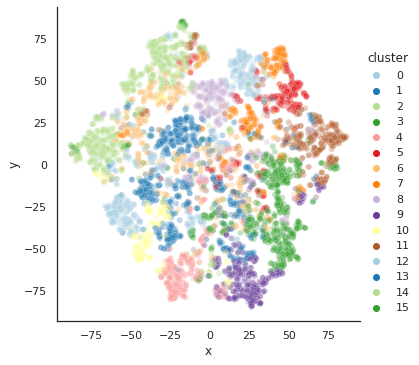

In [716]:
sns.relplot(x="x", y="y", hue="cluster", data=last_df, palette='Paired', sizes=30, alpha=0.3)

In [469]:
kmeans.inertia_

5.523140361005182

In [470]:
cat_df['cluster'] = y_pred

In [471]:
distance = []

for i, rows in cat_df.iterrows():
    cluster = kmeans.cluster_centers_[rows[1]]
    vec = rows[0]
    
    dist = np.sum(cluster ** 2 + vec ** 2)
    distance.append(dist)

In [472]:
def get_cluster_center(dataframe, cluster_num=20):
    names = []
    for i in range(cluster_num):
        sub_df = dataframe[dataframe.cluster == i]
        row = sub_df[sub_df.distance == sub_df.distance.min()]
        names.append(row.index[0])
    return names

In [475]:
cat_df['distance'] = distance

In [476]:
names = get_cluster_center(cat_df, cluster_num=16)

In [ ]:
weight_model_names = 

In [480]:
df.head(3)

,model_vectors
st04_koelecv3_001,"[0.2715083, 0.008009417, 0.069552675, 0.001548..."
st04_koelecv3_003,"[0.27535617, 0.011491739, 0.07277849, 0.001669..."
st04_koelecv3_000,"[0.2403952, 0.010814292, 0.08880568, 0.0050655..."


In [481]:
new_df.head(2)

,model_vectors
fake_model_000,"[0.255462250467214, 0.010170440146674849, 0.07..."
fake_model_001,"[0.2546471415552612, 0.01309871810157407, 0.07..."


In [485]:
len(fake_weights), len(new_df)

(5000, 5000)

In [487]:
df.index

Index(['st04_koelecv3_001', 'st04_koelecv3_003', 'st04_koelecv3_000',
       'st05_koelecv3_002', 'st06_koelecv3_000', 'st09_koelecv3_001',
       'st05_koelecv3_001', 'st02_koelecv3_000', 'st01_koelecv3_003',
       'st06_koelecv3_003', 'st01_koelecv3_002', 'st09_koelecv3_000',
       'st02_koelecv3_001', 'st05_koelecv3_003', 'st09_koelecv3_003',
       'st05_koelecv3_000'],
      dtype='object')

In [507]:
def get_fake_model_weights(fake_name, fake_weights):
    fake_idx = int(fake_name.split("_")[-1])
    weight = fake_weights[fake_idx]
    return weight

In [512]:
np.zeros(16) + np.ones(16)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [542]:
def get_logits_with_fake_models(fake_model_names, origin_model_names, fake_weights):
    weights_sum = np.zeros(len(origin_model_names))
    
    for fake_name in fake_model_names:
        weights = get_fake_model_weights(fake_name, fake_weights)
        weights_sum += weights.reshape(-1)
        
    answers = np.zeros((1000, 42))
        
    for idx, model_name in enumerate(origin_model_names):
        strategy, ms_name, s_cnt = model_name.split("_")
        model_path = os.path.join(model_dir, model_name + ".pth")

        if not os.path.exists(model_path):
            raise

        args = get_args()
        args = update_args(args, strategy, hp_space.strat)
        args = Namespace(**args)

        model, tokenizer = load_model_and_tokenizer(args)
        test_dataloader = load_test_dataloader(args, tokenizer)

        model.load_state_dict(torch.load(model_path))
        model.to(args.device)

        results = model.evaluate(test_dataloader, return_keys=["logits"])
        answers += (weights_sum[idx] * results['logits'])
        
    return answers

def get_logits_with_models(model_names):
    answers = np.zeros((1000, 42))
        
    for idx, model_name in enumerate(model_names):
        strategy, ms_name, s_cnt = model_name.split("_")
        model_path = os.path.join(model_dir, model_name + ".pth")

        if not os.path.exists(model_path):
            raise

        args = get_args()
        args = update_args(args, strategy, hp_space.strat)
        args = Namespace(**args)

        model, tokenizer = load_model_and_tokenizer(args)
        test_dataloader = load_test_dataloader(args, tokenizer)

        model.load_state_dict(torch.load(model_path))
        model.to(args.device)

        results = model.evaluate(test_dataloader, return_keys=["logits"])
        answers += (weights_sum[idx] * results['logits'])
        
    return answers

In [540]:
model_names

['st05_koelecv3_000']

In [ ]:
fake_names = [name for name in names if name.startswith("fake")]
model_names = [name for name in names if not name.startswith("fake")]

In [593]:
len(fake_names + model_names), len(roberta_no_sampling_names), len(roberta_use_sampling_names)

(16, 3, 3)

In [532]:
koelecv_ensemble_answers = get_logits_with_fake_models(fake_names, list(df.index), fake_weights)

Some weights of the model checkpoint at monologg/koelectra-base-v3-discriminator were not used when initializing ElectraForSequenceClassification: ['discriminator_predictions.dense.weight', 'discriminator_predictions.dense.bias', 'discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense_prediction.bias']
- This IS expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at monologg/koelectra-base-v3-discriminator and are newly initialized: 

In [543]:
koelecv_real_answers = get_logits_with_models(model_names)

Some weights of the model checkpoint at monologg/koelectra-base-v3-discriminator were not used when initializing ElectraForSequenceClassification: ['discriminator_predictions.dense.weight', 'discriminator_predictions.dense.bias', 'discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense_prediction.bias']
- This IS expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at monologg/koelectra-base-v3-discriminator and are newly initialized: 

In [548]:
# koelecv3 with clustering
group_logits_one = koelecv_ensemble_answers + koelecv_real_answers

In [581]:
# roberta with no sampling, 과대적합 된 모델들
group_logits_two = get_logits_with_models(roberta_no_sampling_names)

Some weights of the model checkpoint at xlm-roberta-large were not used when initializing XLMRobertaForSequenceClassification: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-large and are newly initialized: ['classifier.den

In [583]:
# roberta with sampling, 과대적합 되지 않은 모델들
group_logits_three = get_logits_with_models(roberta_use_sampling_names)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at monologg/kobert and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of the model checkpoint at xlm-roberta-large were not used when initializing XLMRobertaForSequenceClassification: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model that you 

In [584]:
group_logits_one.shape, group_logits_two.shape, group_logits_three.shape

((1000, 42), (1000, 42), (1000, 42))

In [590]:
group_logits_one

array([[ 62.96881974,  18.86459206, 109.33033156, ..., -44.02526227,
        -56.84731171, -14.74968454],
       [ 53.37328726, -29.89250897,  16.18333934, ...,  -8.18517124,
        -52.28045273, -20.60502782],
       [ 26.0244427 , 116.26774323,   8.95521519, ..., -32.72353558,
        -24.02108377, -28.6464922 ],
       ...,
       [ 58.41189209, -28.54733424,  19.42656091, ..., -14.62532395,
        -59.97117506, -25.06561403],
       [ 83.54876342, -15.5130929 ,  18.99730745, ..., -36.59298591,
        -73.43642056, -38.8683897 ],
       [ 60.68893707, -34.01343247,   1.68934004, ...,   2.48181649,
        -46.6479712 , -29.89846449]])

In [587]:
group_logits_two

array([[11.09335876,  1.4779329 ,  8.4705404 , ..., -1.87900391,
        -2.37292004, -1.68216029],
       [ 5.46017474, -1.69207603,  1.13421521, ..., -0.11397946,
        -1.30895898, -1.24889797],
       [ 3.9729836 , 10.35488653, -0.14719018, ..., -1.5314188 ,
        -0.90085024, -1.09492879],
       ...,
       [ 6.65110385, -1.69951811,  0.64543642, ..., -0.92904875,
        -1.93243816, -1.53025639],
       [12.68028831,  1.66393209,  1.94404224, ..., -2.04475844,
        -2.1980575 , -1.78740743],
       [11.16522384, -0.5967476 ,  1.21399775, ..., -0.8996858 ,
        -2.25137067, -2.03805229]])

In [588]:
group_logits_three

array([[ 9.87358284, -0.5719151 ,  7.18208051, ..., -2.05645957,
        -2.27642733, -1.63405134],
       [ 7.75614023, -1.49061057,  1.17484158, ..., -1.99039713,
        -1.64269497, -1.71811984],
       [ 4.64983532,  5.9015134 ,  0.33477458, ..., -1.99614421,
        -1.38436464, -1.18694474],
       ...,
       [ 7.58726859, -1.45456082,  1.00842065, ..., -2.19924948,
        -1.74737287, -1.52341601],
       [ 9.33051634,  0.38721505,  0.66494229, ..., -2.51045132,
        -1.89149088, -1.53204035],
       [ 8.51746774, -1.34461486,  1.02479409, ..., -1.24431109,
        -2.7628203 , -1.68183342]])

## Group 설명

16, 3, 3

1. group_logits_one, clustering을 통해서 나온 서로 다른 분포의 Koelectra Model들
2. group_logits_two, roberta-large, 다른 데이터 분포 + sampling 하지 않은 모델들
3. group_logits_three, roberta-largs, 다른 데이터 분포 + sampling 한 모델들

## Ensemble 전략

> 5번의 제출 기회..

- 가중치 없이 제출 
    - g1 + g2 + g3
- 그룹별 동일한 가중치로 제출
    - g1 / 16 + g2 / 3 + g3 / 3
- 샘플링 안 한 모델들한테 가중치 폭탄
    - 0.1 * ga1 + 0.8 * ga2 + 0.1 *ga3 
- 큰 모델들한테 가중치 많이 주기
    - 0.2 * ga1 + 0.4 * ga2 + 0.4 * ga3
- 로또 가중치

In [594]:
g1 = group_logits_one
g2 = group_logits_two
g3 = group_logits_three
ga1 = group_logits_one / 16
ga2 = group_logits_two / 3
ga3 = group_logits_three / 3

In [646]:
def make_ensemble_csv(preds, filename="", save=True):
    preds = np.array(preds.argmax(-1)).reshape(-1)
    print(len(preds), preds.shape, preds[:25])
    if save:
        output = pd.DataFrame(preds, columns=['pred'])
        output.to_csv(filename, index=False)

In [647]:
make_ensemble_csv(g1 + g2 + g3, filename="ensemble1.csv")

1000 (1000,) [ 2 10  1 17  0 33  7 28  4 20 15  5  0 21  5  0  0 21  0 10 15  5  9 27
  4]


In [648]:
make_ensemble_csv(ga1 + ga2 + ga3, filename="ensemble2.csv")

1000 (1000,) [ 2 10  1  0  0 33  7  0  4 20  0  5  0  8  0  0  0  7  0 10 15  5  0 27
  4]


In [653]:
make_ensemble_csv(0.1 * ga1 + 0.8 * ga2 + 0.1 * ga3, filename="ensemble3.csv")

1000 (1000,) [ 0 10  1  0  0 33  7  0  4 20  0  0  0  8  0  0  0  7  0 10 15  5  0 27
  4]


In [656]:
make_ensemble_csv(0.2 * ga1 + 0.4 * ga2 + 0.4 * ga3, filename="ensemble4.csv")

1000 (1000,) [ 0 10  1  0  0 33  7  0  4 20  0  5  0  8  0  0  0  7  0 10 15  5  0 27
  4]


In [651]:
w1, w2, w3 = [np.random.uniform() for _ in range(3)]
make_ensemble_csv(w1 * ga1 + w2 * ga2 + w3 * ga3, filename="ensemble5.csv")

1000 (1000,) [ 0 10  1  0  0 33  7  0  4 20  0  0  0  8  0  0  0  7  0 10 15  5  0 27
  4]


In [680]:
w1, w2, w3

(0.04527839889342622, 0.8756228879860936, 0.3919615483338257)

In [655]:
make_ensemble_csv(ga2, filename="ensemble6.csv")

1000 (1000,) [ 0 10  1  0  0  0  7  0  4 20  0  0  0  8  0  0  0  7  0 10 15  5  0 27
  4]


In [645]:
pwd

'/opt/ml/P-Stage/2-STAGE/notebook'

In [660]:
from collections import Counter

In [695]:
a = Counter(ga2.argmax(-1))

In [696]:
a

Counter({0: 492,
         10: 103,
         1: 6,
         7: 24,
         4: 79,
         20: 21,
         8: 29,
         15: 33,
         5: 27,
         27: 5,
         12: 6,
         21: 20,
         22: 8,
         17: 18,
         2: 63,
         9: 16,
         39: 4,
         33: 9,
         24: 8,
         14: 4,
         6: 19,
         19: 2,
         32: 1,
         3: 1,
         23: 1,
         38: 1})

In [697]:
ga2_preds = np.array(ga2.argmax(-1)).reshape(-1)
ga3_preds = np.array(ga3.argmax(-1)).reshape(-1)

In [698]:
for k, v in a.items():
    a[k] = v / 1000

In [699]:
sum(a.values())

1.0000000000000002

In [700]:
total = 0.0
limits = 0.8
change_idx = []

for k, v in a.items():
    total += v
    
    if total > limits:
        change_idx.append(k)

In [701]:
change_idx

[5, 27, 12, 21, 22, 17, 2, 9, 39, 33, 24, 14, 6, 19, 32, 3, 23, 38]

In [707]:
for cidx in change_idx:
    fancy_idx = np.where(ga2_preds == cidx)
    
    ga2_preds[fancy_idx] = ga3_preds[fancy_idx]
    
    print("전체 길이:", len(fancy_idx[0]), "같은 값:", end='')
    print(sum(ga2_preds[fancy_idx] == ga3_preds[fancy_idx]))

전체 길이: 27 같은 값:27
전체 길이: 5 같은 값:5
전체 길이: 6 같은 값:6
전체 길이: 20 같은 값:20
전체 길이: 8 같은 값:8
전체 길이: 18 같은 값:18
전체 길이: 63 같은 값:63
전체 길이: 16 같은 값:16
전체 길이: 4 같은 값:4
전체 길이: 9 같은 값:9
전체 길이: 9 같은 값:9
전체 길이: 4 같은 값:4
전체 길이: 19 같은 값:19
전체 길이: 2 같은 값:2
전체 길이: 1 같은 값:1
전체 길이: 1 같은 값:1
전체 길이: 1 같은 값:1
전체 길이: 1 같은 값:1


In [712]:
len(ga2_preds)

1000

In [711]:
output = pd.DataFrame(ga2_preds, columns=['pred'])
output.to_csv("ensemble7.csv", index=False)

In [703]:
1 + 2 + 1 + 1 + 1 + 11 + 2 + 9 + 6

34

In [704]:
34 / 1000

0.034

In [705]:
3.4

3.4